In [2]:
import os
%matplotlib inline
import json
import scipy.stats as stats
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce
plt.style.use('default')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [3]:
# !pwd

In [4]:
# for filename in os.listdir('/home/jovyan/work/galvanize/capstone1/src'):
#     print(type(filename))

In [5]:

# with open('../data/competitions.json') as data_file:    
#     data = json.load(data_file)
# competitions_df = pd.json_normalize(data, sep = "_")

In [6]:
# competitions_df.head()

In [7]:
# competitions_df.info()

In [8]:
# with open('../data/events/15946.json') as data_file:    
#     data = json.load(data_file)
# event15946_df = pd.json_normalize(data, sep = "_")

In [9]:
# event15946_df.head()

In [10]:
# event15946_df.info()

In [11]:
# data = json.load(open('../data/lineups/15946.json'))
# lineup15946_df = pd.json_normalize(data, sep = "_")

In [12]:
# lineup15946_df.head()

In [13]:
# lineup15946_df.info()

In [14]:
#need to determine what league and season i am in first

In [15]:
# for filename in os.listdir('../data/events'):
#     with open(f'../data/matches/{filename}') as data_file:    
#         data = json.load(data_file)
#     match15946_df = pd.json_normalize(data, sep = "_")

In [16]:
# #run json reader loop into spark, so they load quicker, than convert to pandas and use json_normalize. from here i can go back to spark or stick with pandas

# spark = (ps.sql.SparkSession.builder 
#         .master("local[4]") 
#         .appName("sparkSQL exercise") 
#         .getOrCreate()
#         )
# sc = spark.sparkContext

In [17]:

    
# def json_folder_reader(json_path,match_ids):
#     lst = []
#     for filename,idx in zip(os.listdir(json_path),match_ids):
#         if '.json' not in filename:
#             continue
#         var = pd.json_normalize(json.load(open(json_path + '/' + filename)),sep="_")
#         print(json_path)
#         print(filename)
#         lst.append(var)
#         return lst

In [18]:
# json_folder_reader('../data/events','events')

In [19]:
# filename = pd.json_normalize(data, sep = "_")

In [20]:
# lineups_dict = json_folder_reader('../data/lineups')

In [21]:
# lineups_match_ids = match_ids('../data/lineups','lineups')

# lineups_match_ids[:5]

In [22]:
# lineups_sparkdf_lst = json_folder_reader('../data/lineups',lineups_match_ids)
# lineups_sparkdf_lst[:5]

In [23]:
# for i in lineups_sparkdf_lst:
#     i = i.toPandas()
# for i in lineups_sparkdf_lst:
#     i = pd.json_normalize(i,sep = "_")

In [24]:
# data = json.load(open('../data/lineups/15946.json'))
# lineup15946_df = pd.json_normalize(data, sep = "_")

In [25]:
# dct = {}
# for i in lineups_match_ids:
#     d[i:8] = pd.json_normalize(json.load(open(json_path + '/' + filename)), sep = "_")
    

In [26]:
#use pandas instead, loop through json normalization and wait for it


In [27]:
# #make list of match ids and zip
# def match_ids(json_path):
#     filenames = []
#     for filename in os.listdir(json_path):
#         if '.json' not in filename:
#             continue
#         filenames.append(filename)
#     return filenames

# def match_to_pandas(match):
#     with open(f'../data/events/{match}') as data_file:    
#         data = json.load(data_file)
#     return pd.json_normalize(data, sep = "_")


In [28]:
# d = {}
# for filename in os.listdir('../data/lineups'):
#         if '.json' not in filename:
#             continue
#         d[filename] = match_to_pandas(filename)

In [29]:
# d_events = {}
# for filename in os.listdir('../data/events'):
#         if '.json' not in filename:
#             continue
#         d[filename] = match_to_pandas(filename)

In [30]:
# lineup_match_ids = match_ids('../data/lineups')

In [31]:
# df_dict = {match: match_to_pandas(match) for match in lineup_match_ids}

In [32]:
##

In [33]:
##

In [34]:
##

In [35]:
##

In [36]:
#WEDNESDAY
#PLAN: load in matches/11 and matches/16, load last 10 seasons, query match ids into a dataframe, using ids, loop through /events and /lineups to choose only matching files. (save processing power)

In [37]:
def match_to_pandas_events(match):
    with open(f'../data/events/{match}') as data_file:    
        data = json.load(data_file)
    return pd.json_normalize(data, sep = "_")

def match_to_pandas_lineups(match):
    with open(f'../data/lineups/{match}') as data_file:    
        data = json.load(data_file)
    return pd.json_normalize(data, sep = "_")

In [38]:
# champ_league_dict = {}
# for filename in os.listdir('../data/matches/16'):
#     champ_league_dict[filename] = pd.json_normalize(json.load(open('../data/matches/16' + '/' + filename)),sep="_")


In [39]:
laliga_dict = {}
for filename in os.listdir('../data/matches/11'):
    laliga_dict[filename] = pd.json_normalize(json.load(open('../data/matches/11' + '/' + filename)),sep="_")

In [40]:
# champ_league_merged_matches = pd.concat(champ_league_dict.values(),ignore_index = True)

In [41]:
# champ_league_merged_matches.head() #filter this into the past 10 season

In [42]:
# champ_last10_seasons = champ_league_merged_matches.query('season_season_id == [4,1,2,27,26,25,24,23,22,21]')

In [43]:
laliga_merged_matches = pd.concat(laliga_dict.values(),ignore_index = True)

In [44]:
# laliga_last10_seasons = laliga_merged_matches.query('season_season_id == [4,1,2,27,26,25,24,23,22,21]')

In [45]:
# champ_league_matchids = champ_last10_seasons['match_id']
# laliga_matchids = laliga_last10_seasons['match_id']

In [46]:
# champ_league_matchids = list(champ_league_matchids)
# for idx,i in enumerate(champ_league_matchids):
#     champ_league_matchids[idx] = str(i)
# champ_league_matchids
# laliga_matchids = list(laliga_matchids)
# for idx,i in enumerate(laliga_matchids):
#     laliga_matchids[idx] = str(i)
# laliga_matchids

In [47]:
# champ_last10seasons_lineups = {}
# for filename in os.listdir('../data/lineups'):
#         if filename[:-5] not in champ_league_matchids:
#             continue
#         champ_last10seasons_lineups[(filename[:-5])] = match_to_pandas_lineups(filename)

In [48]:
# champ_last10seasons_events = {}
# for filename in os.listdir('../data/events'):
#         if filename[:-5] not in champ_league_matchids:
#             continue
#         champ_last10seasons_events[(filename[:-5])] = match_to_pandas_events(filename)

In [49]:
# laliga_last10seasons_lineups = {}
# for filename in os.listdir('../data/lineups'):
#         if filename[:-5] not in laliga_matchids:
#             continue
#         laliga_last10seasons_lineups[(filename[:-5])] = match_to_pandas_lineups(filename)

In [50]:
# laliga_last10seasons_events = {}
# for filename in os.listdir('../data/events'):
#         if filename[:-5] not in laliga_matchids:
#             continue
#         laliga_last10seasons_events[(filename[:-5])] = match_to_pandas_events(filename)


#TOO BIG TO QUERY. PIVOTING TO SMALLER DATASETS AND NO LONGER LOOKING AT CHAMPIONS LEAGUE

In [51]:
#smaller data
laliga_last_season = laliga_merged_matches.query('season_season_id == [4]')
laliga_last_season.reset_index()
laliga_matchids = list(laliga_last_season['match_id'])
for idx,i in enumerate(laliga_matchids):
    laliga_matchids[idx] = str(i)
laliga_matchids

['16157',
 '16136',
 '16215',
 '16248',
 '16056',
 '16289',
 '16079',
 '16149',
 '16275',
 '15973',
 '16317',
 '16131',
 '16109',
 '16205',
 '16095',
 '16306',
 '16010',
 '15986',
 '16240',
 '15978',
 '16173',
 '16023',
 '16265',
 '16196',
 '15956',
 '15946',
 '16231',
 '15998',
 '16029',
 '16073',
 '16086',
 '16120',
 '16182',
 '16190']

In [52]:
# laliga_matchids

In [53]:
laliga_lastseason_events = {}
for filename in os.listdir('../data/events'):
        if filename[:-5] not in laliga_matchids:
            continue
        laliga_lastseason_events[int(filename[:-5])] = match_to_pandas_events(filename)


In [54]:
# laliga_lastseason_events

In [55]:
laliga_lastseason_lineups = {}
for filename in os.listdir('../data/lineups'):
        if filename[:-5] not in laliga_matchids:
            continue
        laliga_lastseason_lineups[int(filename[:-5])] = match_to_pandas_lineups(filename)

In [56]:
laliga_last_season.set_index('match_id', inplace=True)

In [57]:

laliga_last_season['events'] = laliga_last_season.index.map(laliga_lastseason_events)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
list(laliga_last_season['events'][16157].columns)

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'type_id',
 'type_name',
 'possession_team_id',
 'possession_team_name',
 'play_pattern_id',
 'play_pattern_name',
 'team_id',
 'team_name',
 'tactics_formation',
 'tactics_lineup',
 'related_events',
 'location',
 'player_id',
 'player_name',
 'position_id',
 'position_name',
 'pass_recipient_id',
 'pass_recipient_name',
 'pass_length',
 'pass_angle',
 'pass_height_id',
 'pass_height_name',
 'pass_end_location',
 'pass_type_id',
 'pass_type_name',
 'pass_body_part_id',
 'pass_body_part_name',
 'carry_end_location',
 'under_pressure',
 'duel_type_id',
 'duel_type_name',
 'pass_aerial_won',
 'pass_outcome_id',
 'pass_outcome_name',
 'ball_receipt_outcome_id',
 'ball_receipt_outcome_name',
 'counterpress',
 'interception_outcome_id',
 'interception_outcome_name',
 'pass_assisted_shot_id',
 'pass_shot_assist',
 'shot_statsbomb_xg',
 'shot_end_location',
 'shot_key_pass_id',
 'shot_body_part_id',
 

In [59]:
# pass_column = [i for i in df.columns if i.startswith("pass")]
# dribble_column = [i for i in df.columns if i.startswith("dribble")]
# laliga_last_season.where(laliga_last_season['type_name'] == 'Possession')

In [60]:
laliga_last_season['events'][16157][['possession','type_name','duration','possession_team_name','location']].where(laliga_last_season['events'][16157]['possession_team_name'] == 'Barcelona')[4:100]
#try to take the above line of code and turn it into code

,possession,type_name,duration,possession_team_name,location
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,12.0,Ball Receipt*,NaN,Barcelona,"[44.0, 67.0]"
96,12.0,Carry,0.696781,Barcelona,"[44.0, 67.0]"
97,13.0,Pass,0.917737,Barcelona,"[46.0, 66.0]"
98,13.0,Ball Receipt*,NaN,Barcelona,"[57.0, 76.0]"


In [61]:
barcelona_locations_16157 = laliga_last_season['events'][16157].loc[(laliga_last_season['events'][16157]['possession_team_name']=='Barcelona'),['location']].dropna(subset=['location'])['location']
barcelona_locations_16157

80        [2.0, 38.6]
81       [14.0, 36.0]
82       [35.0, 22.0]
83       [35.0, 22.0]
84       [48.0, 20.0]
            ...      
4458    [101.0, 17.0]
4459     [22.0, 58.0]
4460     [22.0, 58.0]
4461      [56.0, 6.0]
4462     [62.0, 77.0]
Name: location, Length: 3024, dtype: object

In [62]:
valencia_locations_16157 = laliga_last_season['events'][16157].loc[(laliga_last_season['events'][16157]['possession_team_name']=='Valencia'),['location']].dropna(subset=['location'])['location']

In [63]:

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

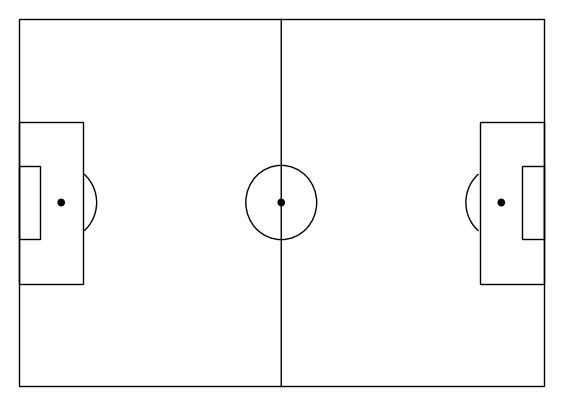

In [64]:

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

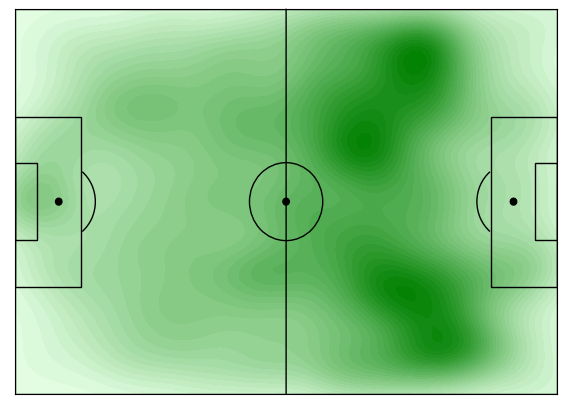

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(0, 80)
plt.xlim(0, 120)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
x_coord = [i[0] for i in barcelona_locations_16157]
y_coord = [i[1] for i in barcelona_locations_16157]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

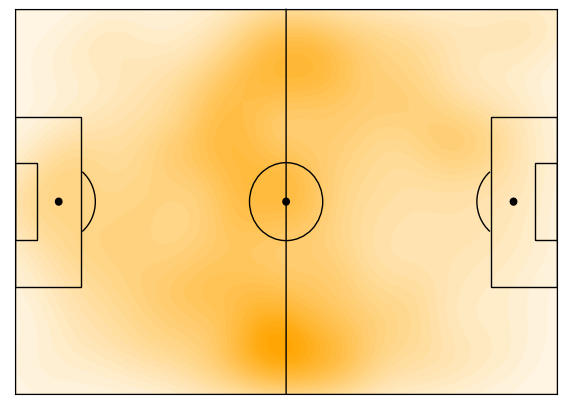

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(0, 80)
plt.xlim(0, 120)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
x_coord = [i[0] for i in valencia_locations_16157]
y_coord = [i[1] for i in valencia_locations_16157]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "orange", n_levels = 30)
plt.show()

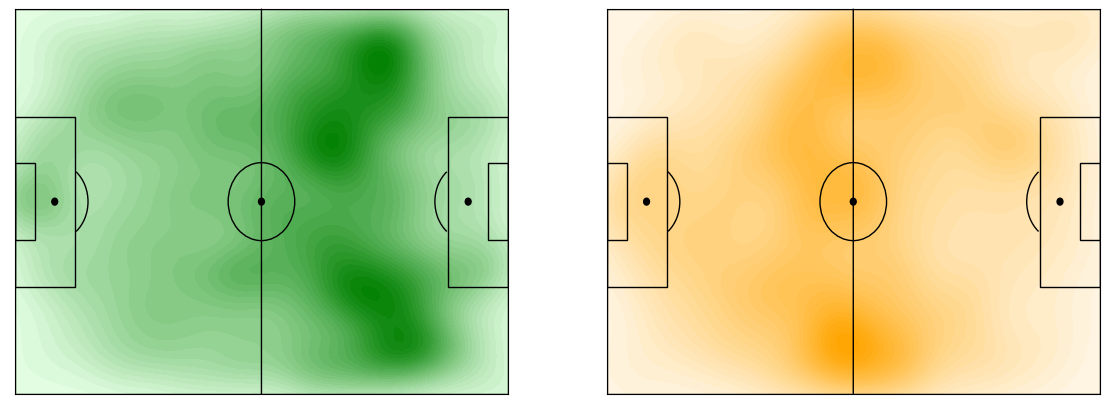

In [67]:
fig, axs = plt.subplots(1,2,sharex=True,sharey=True)
fig.set_size_inches(14, 5)
draw_pitch(axs[0]) #overlay our different objects on the pitch
axs[0].set_ylim(0, 80)
axs[0].set_xlim(0, 120)
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
draw_pitch(axs[1]) #overlay our different objects on the pitch
axs[1].set_ylim(0, 80)
axs[1].set_xlim(0, 120)
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
x_coord1 = [i[0] for i in barcelona_locations_16157]
y_coord1 = [i[1] for i in barcelona_locations_16157]
x_coord2 = [i[0] for i in valencia_locations_16157]
y_coord2 = [i[1] for i in valencia_locations_16157]
sns.kdeplot(x_coord2, y_coord2, shade = "True", color = "orange", n_levels = 30, ax=axs[1])
sns.kdeplot(x_coord1, y_coord1, shade = "True", color = "green", n_levels = 30, ax=axs[0]);

In [68]:
# #write a function to automate this plotting process for each team, add 'team1 (home) vs team2 (away)' as graph title
# #first function to create dict holding all match location data
def auto_matchlist_locations(match_ids): 
    d = {}
    for i in match_ids:
        home = laliga_last_season['home_team_home_team_name'].loc[int(i)]
        away = laliga_last_season['away_team_away_team_name'].loc[int(i)]
        home_loc = laliga_last_season['events'][int(i)].loc[(laliga_last_season['events'][int(i)]['possession_team_name'] == home),['location']].dropna(subset=['location'])['location']
        away_loc = laliga_last_season['events'][int(i)].loc[(laliga_last_season['events'][int(i)]['possession_team_name'] == away),['location']].dropna(subset=['location'])['location']
        d[(home,away)] = (home_loc,away_loc)
    return d
event_locos_lastseason = auto_matchlist_locations(laliga_matchids)
# event_locos_lastseason

In [69]:
def soc_plot_auto_bymatch(d,home,away):
    fig, axs = plt.subplots(1,2,sharex=True,sharey=True)
    fig.set_size_inches(14, 5)
    draw_pitch(axs[0]) #overlay our different objects on the first pitch
    axs[0].set_ylim(0, 80)
    axs[0].set_xlim(0, 120)
    axs[0].get_xaxis().set_visible(False)
    axs[0].get_yaxis().set_visible(False)
    axs[0].set_title(home)
    draw_pitch(axs[1]) #overlay our different objects on the second pitch
    axs[1].set_ylim(0, 80)
    axs[1].set_xlim(0, 120)
    axs[1].get_xaxis().set_visible(False)
    axs[1].get_yaxis().set_visible(False)
    axs[1].set_title(away)
    x_coord1 = [i[0] for i in d[(home,away)][0]]
    y_coord1 = [i[1] for i in d[(home,away)][0]]
    x_coord2 = [i[0] for i in d[(home,away)][1]]
    y_coord2 = [i[1] for i in d[(home,away)][1]]
    sns.kdeplot(x_coord2, y_coord2, shade = "True", color = "orange", n_levels = 30, ax=axs[1])
    sns.kdeplot(x_coord1, y_coord1, shade = "True", color = "green", n_levels = 30, ax=axs[0]);

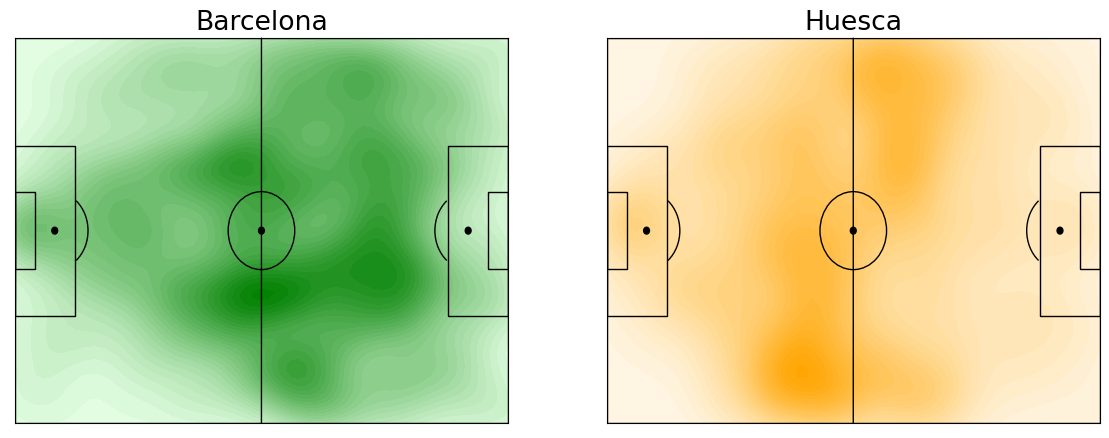

In [70]:
soc_plot_auto_bymatch(event_locos_lastseason,'Barcelona','Huesca')

# game_locations = laliga_last_season['events'][16157].loc[(laliga_last_season['events'][16157]['location']!=pd.NA),['location']].dropna(subset=['location'])['location']
# game_locations

In [95]:
event_locos_lastseason[('Barcelona','Huesca')]

(26       [14.0, 19.0]
 27        [3.0, 38.0]
 28        [3.0, 38.0]
 29        [4.0, 38.0]
 30       [12.0, 45.0]
             ...      
 3688    [117.0, 60.0]
 3689      [3.0, 20.0]
 3690    [118.0, 61.0]
 3691    [108.1, 40.1]
 3692      [1.0, 40.0]
 Name: location, Length: 2514, dtype: object,
 4       [61.0, 41.0]
 5       [36.0, 37.0]
 6       [36.0, 37.0]
 7       [43.0, 40.0]
 8       [93.0, 50.0]
             ...     
 3693    [60.0, 40.0]
 3694    [50.0, 40.0]
 3695    [50.0, 40.0]
 3696    [51.0, 39.0]
 3697    [48.0, 61.0]
 Name: location, Length: 1165, dtype: object)

In [72]:
#use numpy method for euclidean disctance, then loop on it through every (x,y) point for the specific map, accumulate, and divide by len() of the iteration
#### COORDINATES FOR GOAL ARE: (120,40)
goal_loc = np.array([120,40])
#barca vs huesca... this is the BIGGEST HOME WIN of the season
#barca loop
barca_accum = []
for i in event_locos_lastseason[('Barcelona','Huesca')][0]:
    barca_accum.append(np.linalg.norm(goal_loc - np.array(i)))
barca_goaldists = np.array(barca_accum)
#huesca loop
huesca_accum = []
for i in event_locos_lastseason[('Barcelona','Huesca')][1]:
    huesca_accum.append(np.linalg.norm(goal_loc - np.array(i)))
huesca_goaldists = np.array(huesca_accum)

In [73]:
barca_goaldists.mean()

59.387396474128515

In [74]:
np.median(barca_goaldists)

57.25818568927613

In [75]:
barca_goaldists.max()

122.00409829181969

In [76]:
barca_goaldists.min()

5.0990195135927845

In [77]:
huesca_goaldists.mean()

66.55828077796366

In [78]:
np.median(huesca_goaldists)

67.95586803212802

In [79]:
huesca_goaldists.max()

119.29660514867975

In [80]:
huesca_goaldists.min()

3.605551275463989

In [81]:
#bootstrapping
len(barca_goaldists)

2514

In [82]:
len(huesca_goaldists)

1165

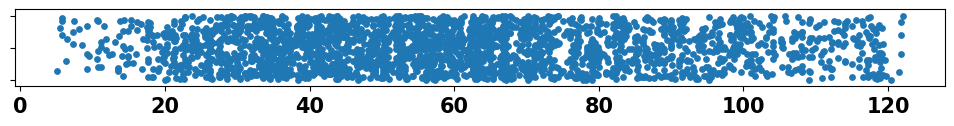

In [83]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    ## why jitter? especially for bootstraping later
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-0.24, 0.24])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
fig, ax = plt.subplots(1, figsize=(12, 1))
one_dim_scatterplot(barca_goaldists, ax, s=15)

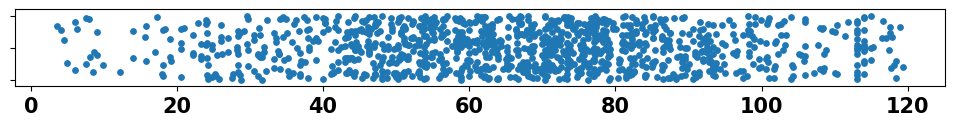

In [84]:
fig, ax = plt.subplots(1, figsize=(12, 1))
one_dim_scatterplot(huesca_goaldists, ax, s=15)

In [85]:
def text_in_blank_plot(text, ax):
    '''make a text box'''
    _ = ax.text(0.5, 0.5, text, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=15)
    ax.axis('off')

In [86]:
# np.random.seed(123)
# fig = plt.subplots(1, 1, figsize=(16, 4))

# ax = plt.subplot2grid((6, 3), (0, 0), colspan=2) # Number of columns for the axis to span downwards.
# ax.get_xaxis().set_ticks([])
# ax.set_xlim(-2.5, 3)
# one_dim_scatterplot(barca_goaldists, ax, s=15)

# ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
# text_in_blank_plot("Original Sample", ax)

## boostrapping 5 times
bootstraps = []
for i in range(0, 5):
    bootstrap = np.random.choice(barca_goaldists, size=len(barca_goaldists), replace=True)
    bootstraps.append(bootstrap)
bootstraps

[array([ 57.00877125,  47.85394446,  62.64982043, ..., 107.48953437,
         45.35416188,  18.43908891]),
 array([41.14608122, 58.18075283, 69.23149572, ..., 60.90155991,
        78.29431652, 79.12016178]),
 array([ 57.72347876, 113.99122773, 113.99122773, ...,  33.12099032,
         67.44627492,  49.33558553]),
 array([26.30589288, 86.40023148, 55.        , ..., 58.69412236,
        56.32051136, 41.14608122]),
 array([66.76076692, 34.92849839, 73.54590403, ..., 77.0584194 ,
        42.72001873, 50.21951812])]

In [94]:
type(barca_goaldists)

numpy.ndarray

In [88]:
# def bootstrap_sample_medians(data, n_bootstrap_samples=10**4):
#     bootstrap_sample_medians = []
#     for i in range(n_bootstrap_samples):
#         bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
#         bootstrap_sample_medians.append(np.median(bootstrap_sample))
#     return bootstrap_sample_medians

In [89]:
def bootstrap_samples(data,samples):
    lst = []
    for i in range(samples):
        bootstrap = np.random.choice(data, size=len(data), replace=True)
        lst.append(np.mean(bootstrap))
    return np.array(lst)

In [90]:
# bootstrap_samples(barca_goaldists,10000)

In [91]:
# bootstrap_samples(huesca_goaldists,10000)

In [92]:
mean_diff = bootstrap_samples(barca_goaldists,10000) - bootstrap_samples(huesca_goaldists,10000)

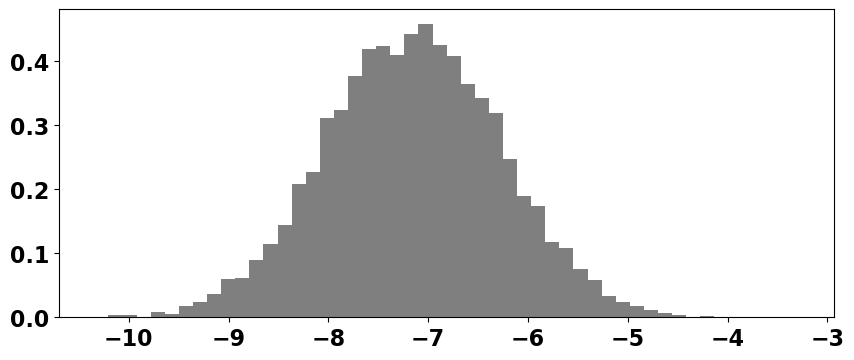

In [93]:
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(mean_diff, bins=50, density=True, color="black", alpha=0.5);

In [102]:
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.plot(barca_goaldists, label = 'Barcelona', marker = '*', linestyle = '', color = 'red')
# ax.plot(huesca_goaldists, label = 'Huesca', marker = 'o', linestyle = '', color = 'blue')
# ax.axhline(np.mean(barca_goaldists), color = 'red', alpha = .2)
# ax.axhline(np.mean(huesca_goaldists), color = 'blue', alpha = .2)
# ax.set_xlabel('Distance From Goal')
# ax.set_ylabel('Frequency')
# ax.legend();

In [98]:
stats.ttest_ind(barca_goaldists,huesca_goaldists)

Ttest_indResult(statistic=-8.042328507143266, pvalue=1.1777818632104454e-15)